In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#그래프를 그리기 위한 기본 설정
#폰트 설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
# 폰트 설정 - 맥
# plt.rcParams['font.family'] = 'AppleGothic'

#그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6

#글자 크기
plt.rcParams['font.size'] = 14

#폰트 설정 시 - 기호 깨지는 것 방지하기
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.facecolor'] = 'white'

### 1차원 분포 플롯
- 데이터의 분포를 확인하기 위해서 산점도(scatter)를 사용한다.
- 산점도는 x축과 y축이 지정되어야 하기 때문에 1차원 데이터는 표현할 수 없다.
- 이에 seaborn에서 1차원 데이터의 분표를 볼 수 있는 것을 제공한다.

In [2]:
iris = pd.read_csv('data/iris.csv')
iris.columns = ['꽃받침길이', '꽃받침너비',
                '꽃잎길이','꽃잎너비', '품종']
iris

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


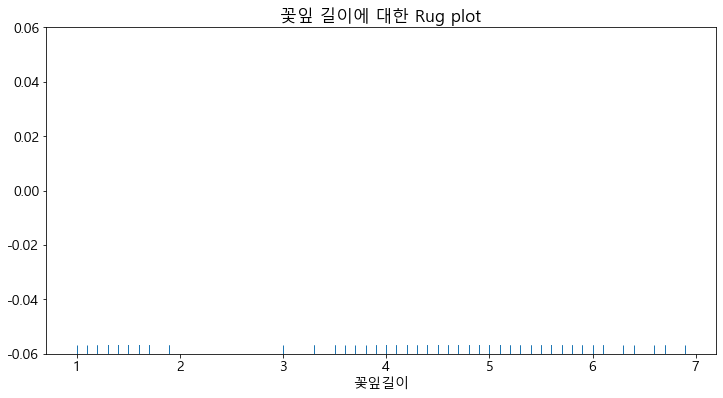

In [4]:
# Rug Plot
# 1차원 데이터에 저장되어 있는 값들의 종류를
##확인할 수 있다.
# 각 값들이 얼마나 저장되어 있는지 확인할 수는 없다.

sns.rugplot(iris['꽃잎길이'])
plt.title('꽃잎 길이에 대한 Rug plot')
plt.show()
# y축은 의미가 없음, 개수 표현

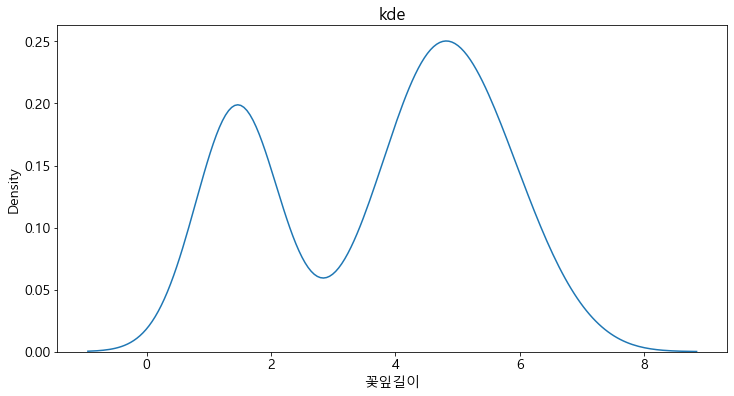

In [6]:
# kde : 커널 함수를 이용해 밀도를 표현한다.
# 히스토그램을 통해 **구간별** 값의 개수를 파악할 수 있다.
## 히스토그램은 막대 그래프로 표현하지만
### kde는 선 그래프로 각 값의 개수를 파악할 수 있다.
#밀도표현(비율)

sns.kdeplot(iris['꽃잎길이'])
plt.title('kde')
plt.show()

C:\Users\medici\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\medici\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


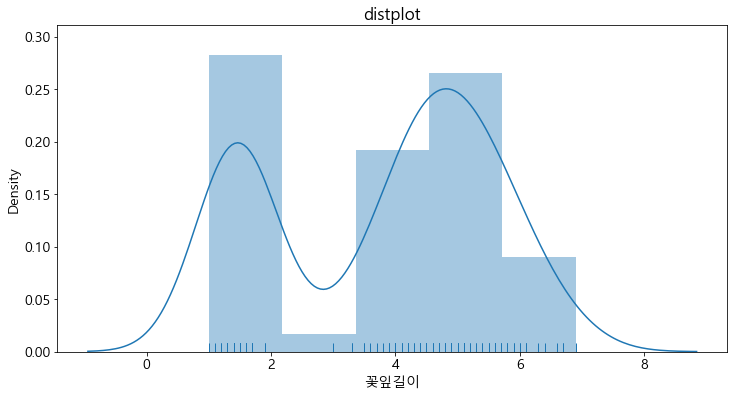

In [11]:
# distplot : 러그와 커널 밀도를 같이 표현하는 함수
# 표시되는 막대그래프는 각 구간별 값의 종류수를 표시한다.
sns.distplot(iris['꽃잎길이'], kde=True, rug=True)
plt.title('distplot')
plt.show()

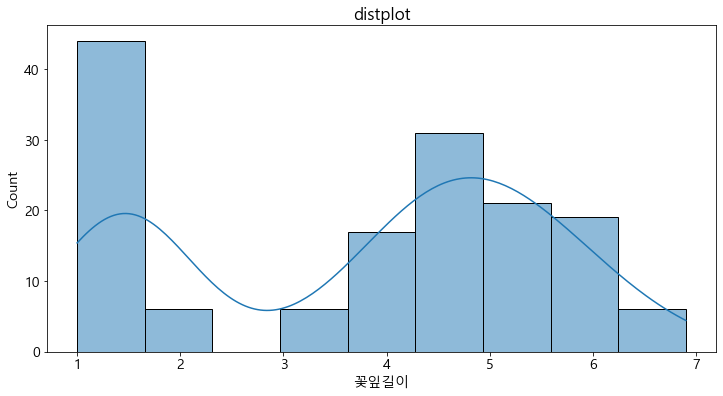

In [16]:
# histplot : 러그와 커널 밀도를 같이 표현하는 함수
# 표시되는 막대그래프는 각 구간별 값의 종류수를 표시한다.
sns.histplot(iris['꽃잎길이'], kde=True)
plt.title('distplot')
plt.show()

###카운트 플롯
- 특정 컬럼의 데이터의 개수를 막대 그래프로 표현한 그래프.
- 특정된 컬럼의 데이터의 각 종류별로 몇 개씩 저장되어 있는지 확인할 수 있는 그래프이다.
- 간단하게 그릴 수 있다는 장점을 가지고 있고 matplotlib나 데이터 프레임을 통해 그래프를 그릴 때 오류를 발생하는 부분을 해결한 그래프

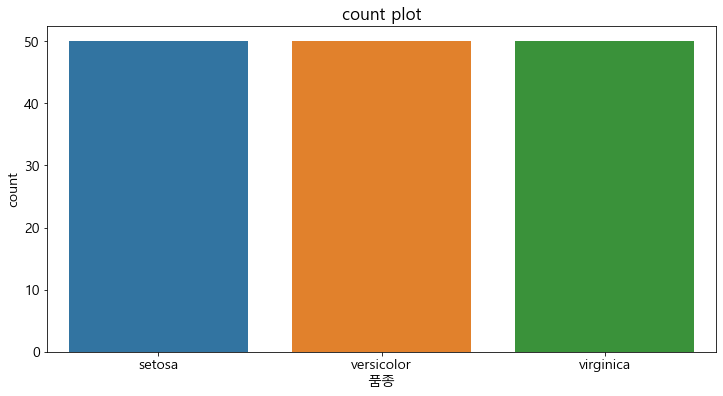

In [13]:
sns.countplot(data=iris, x='품종')
plt.title('count plot')
plt.show()

### 다차원 데이터
- 데이터 변수가 여러 개인 다차원 데이터를 표현할 수 있다.
- 분석하고자 하는 데이터가 모두 범위 값인 경우
- 분석하고자 하는 데이터가 모두 카테고리 값인 경우
- 분석하고자 하는 데이터가 모두 범위형과 카테고리형이 섞여있는 경우

### 2차원 실수형 데이터

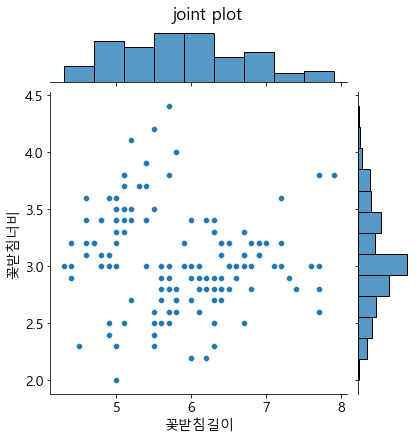

In [24]:
# jointplot : 산점도와 히스토그램을 같이 표현한다.
sns.jointplot(x='꽃받침길이',y='꽃받침너비', data=iris)
plt.suptitle('joint plot', y=1.02)
plt.show()

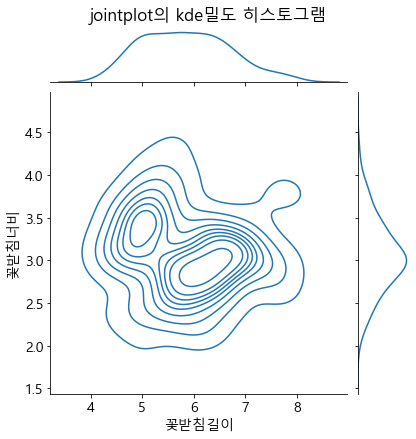

In [20]:
# kind에 kde를 넣어주면  kde 커널 밀도 히스토그램을
##그릴 수 있다.
sns.jointplot(x='꽃받침길이',y='꽃받침너비',
              kind='kde', data=iris)
plt.suptitle('jointplot의 kde밀도 히스토그램', y=1.02)
plt.show()

### PairPlot
- 산점도의 경우에는 2차원 데이터. 즉 컬럼 두 개를 지정하여 표현한다.
- 만약 데이터 프레임의 컬럼이 다수인 경우 산점도를 그리려면 개발자가 꽤 많은 그래프를 그려야 한다.
- Pairplot은 데이터 프레임의 각 컬럼들을 조합한 산점도를 모두 표현해준다. 
- 여기에 히스토그램도 같이 표현해준다.


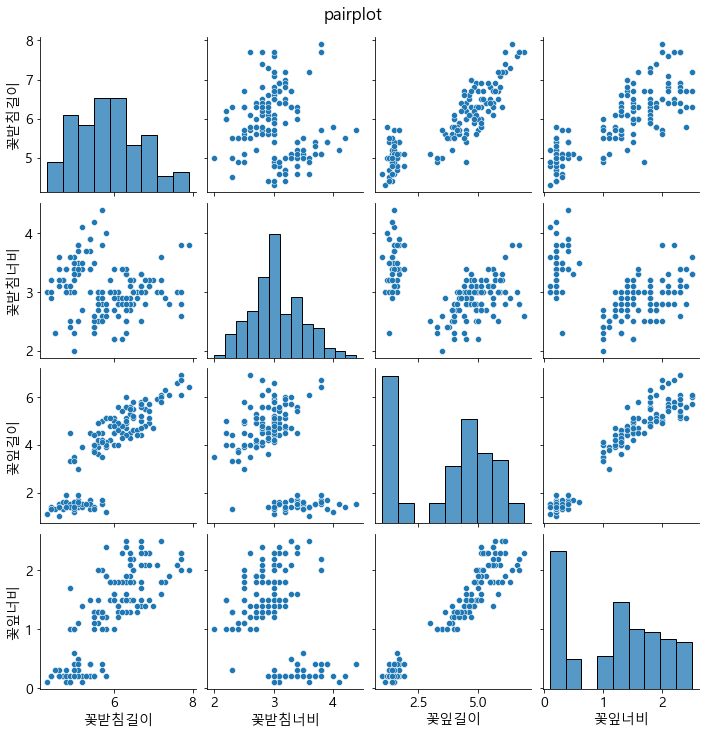

In [26]:
sns.pairplot(iris)
plt.suptitle('pairplot', y=1.02)
plt.show()

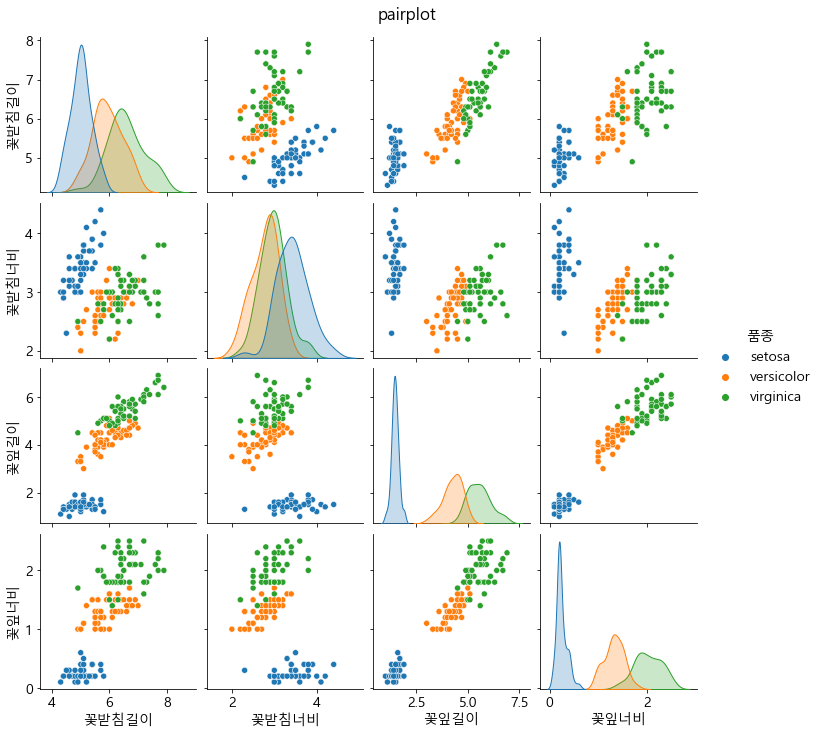

In [27]:
# hue : 결과데이터에 해당하는 컬럼을 지정한다.
## 지정된 컬럼의 값이 똑같은 것끼리 같은 색으로 표시한다.
sns.pairplot(iris, hue='품종')
plt.suptitle('pairplot', y=1.02)
plt.show()
# 데이터를 최대한 많이 살리고 성능이 좋지 않다면 조금씩 최적화
## 학습속도가 올라가고, 결과데이터를 빨리 추출함.

### Heatmap
- 컬럼 간의 상관관계나 데이터의 양을 색상으로 표현해 확인하는 그래프.  

In [28]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [29]:
# pivot 테이블을 구한다
# 컬럼 하나를 x축, 하나를 y축으로 지정하여
## 3번째 지정된 것을 값으로 하는 테이블을 의미한다.
## 로우 하나의 데이터를 테이블 형태로 만든 테이블.
df = flights.pivot('month', 'year', 'passengers')
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


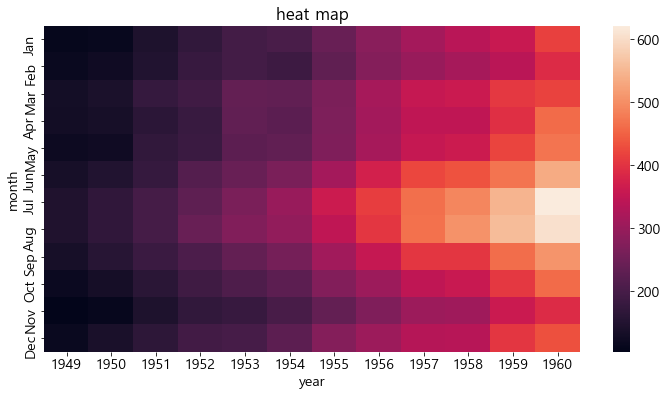

In [30]:
# heat맵을 그린다.


sns.heatmap(df)
plt.title('heat map')
plt.show()

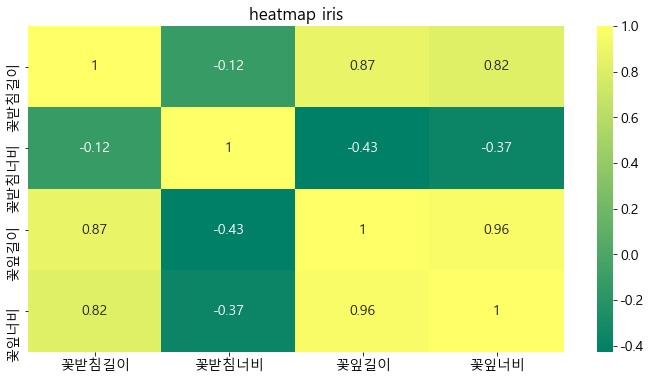

In [44]:
# 상관관계를 heat으로 표현한다.
a1 = iris.corr()
sns.heatmap(a1, annot=True,cmap ='summer')
#annot 값 생성
#cmap : 색상 팔레트
plt.title('heatmap iris')
plt.show()